In [29]:
class MyClass():

    instances = []

    def __init__(self,name:str,num:int) -> None:
        self.name = name
        self.num = num

        MyClass.instances.append(self)
    def __str__(self) -> str:
        return f"{type(self).__name__}"


MyClass("my",8)
MyClass("name",9)
MyClass("is",7)
print(MyClass("moshood",9))

# for instance in MyClass.instances:
#     print(instance.name)



MyClass


In [5]:
from __future__ import annotations 
from enum import Enum

class CapitalType(Enum):
    """
    The different types of capitals (e.g. "primary").
    """
    primary = "primary"
    admin = "admin"
    minor = "minor"
    unspecified = ""
    def __str__(self) -> str:
        return self.value





In [6]:

class Country():
    """
    Represents a country.
    """
    countries = dict() # a dict that associates country names to instances.

    

    def __init__(self, name: str, iso3: str) -> None:
        """
        Creates an instance with a country name and a country ISO code with 3 characters.
        """
        self.name = name
        self.code = iso3
        self.cities = []

        Country.countries[name] = self
       
    def _add_city(self, city):
        """
        Adds a city to the country.
        """
        
        self.cities.append(city)
        
    def get_cities(self, *capital_types: list):
        """
        Returns a list of cities of this country.
        The argument capital_types can be given to specify a subset of the capital types that must be 
        returned.
        Cities that do not correspond to these capital types are not returned.
        If no argument is given, all cities are returned.

        """
        # def mine(name ,*lst):
        #     if lst:
        #         print(name,lst[0])
        #     else:
        #         print(name)

        # mine('moshood',[2,5,5,6,3])
        cities_cap = []
        if capital_types:
            for city in self.cities:
                if city.capital_type in [str(i) for i in   capital_types[0]]:
                    cities_cap.append(city)
            return cities_cap
                
        else:
            return self.cities
            

           

        
    def get_city(self, city_name: str) :
        """
        Returns a city of the given name in this country.
        Returns None if there is no city by this name.
        If there are multiple cities of the same name, returns an arbitrary one.
        """
        for city in self.cities:
            if city.name == city_name:
                return city
        else:
            pass
        
        
    def __str__(self) -> str:

        """
        Returns the name of the country.
        """
        return self.name






In [7]:
from geopy.distance import great_circle


class City():
    """
    Represents a city.
    """
    cities = dict() # a dict that associates city IDs to instances.
    def __init__(self, name: str, latitude: str, longitude: str, country: str, capital_type: str, city_id: str) -> None:
        """
        Initialises a city with the given data.
        """
        self.name = name
        self.latitude = latitude
        self.longitude = longitude
        self.country = country
        self.capital_type = capital_type
        self.city_id = city_id

        City.cities[city_id] = self

    def distance(self, other_city) -> int:
        """
        Returns the distance in kilometers between two cities using the great circle method,
        rounded up to an integer.
        """
        
        maincity = (float(self.latitude),float(self.longitude))
        othercity = (float(other_city.latitude), float(other_city.longitude))

        

        dist = great_circle(maincity,othercity).km

        return int(dist)

        
    def __str__(self) -> str:
        """
        Returns the name of the city and the country ISO3 code in parentheses.
        For example, "Melbourne (AUS)".

        """
        
        country = Country.countries[self.country]

        country_code = country.code
 
        city = self.name

        return f"{city} ({country_code})"
        
        

    
def create_example_countries_and_cities() -> None:
    """
    Creates a few Countries and Cities for testing purposes.
    """
    australia = Country("Australia", "AUS")
    melbourne = City("Melbourne", "-37.8136", "144.9631", "Australia", "admin", "1036533631")
    australia._add_city(melbourne)
    canberra = City("Canberra", "-35.2931", "149.1269", "Australia", "primary", "1036142029")
    australia._add_city(canberra)
    sydney = City("Sydney", "-33.865", "151.2094", "Australia", "admin", "1036074917")
    australia._add_city(sydney)

    
    japan = Country ("Japan", "JPN")
    tokyo = City("Tokyo", "35.6839", "139.7744", "Japan", "primary", "1392685764")
    japan._add_city(tokyo)
    
def test_example_countries_and_cities() -> None:
    """
    Assuming the correct cities and countries have been created, runs a small test.
    """
    australia = Country.countries['Australia']
    canberra = australia.get_city("Canberra")
    melbourne = australia.get_city("Melbourne")
    sydney = australia.get_city("Sydney")
    print("The distance between {} and {} is {}km".format(melbourne, sydney, 
    melbourne.distance(sydney)))
    for city in australia.get_cities([CapitalType.admin, CapitalType.primary]):
        print("{} is a {} capital of {}".format(city, city.capital_type, city.country))

if __name__ == "__main__":
    
    create_example_countries_and_cities()
    test_example_countries_and_cities()




The distance between Melbourne (AUS) and Sydney (AUS) is 713km
Melbourne (AUS) is a admin capital of Australia
Canberra (AUS) is a primary capital of Australia
Sydney (AUS) is a admin capital of Australia


In [8]:

City.cities


{'1036533631': <__main__.City at 0x175d4308ac8>,
 '1036142029': <__main__.City at 0x175d4308a88>,
 '1036074917': <__main__.City at 0x175d43089c8>,
 '1392685764': <__main__.City at 0x175d4308b08>}

In [9]:
create_example_countries_and_cities()
test_example_countries_and_cities()

The distance between Melbourne (AUS) and Sydney (AUS) is 713km
Melbourne (AUS) is a admin capital of Australia
Canberra (AUS) is a primary capital of Australia
Sydney (AUS) is a admin capital of Australia


In [10]:
for i in Country.countries:
    print(i)

Australia
Japan


In [11]:
print(Country.countries['Australia'])

Australia


In [12]:
City.cities

{'1036533631': <__main__.City at 0x175d37dd088>,
 '1036142029': <__main__.City at 0x175d37dd7c8>,
 '1036074917': <__main__.City at 0x175d40cb408>,
 '1392685764': <__main__.City at 0x175d40cb908>}

In [ ]:
import csv

from locations import City, Country, test_example_countries_and_cities

def create_cities_countries_from_CSV(path_to_csv: str) -> None:
    """
    Reads a CSV file given its path and creates instances of City and Country for each line.
    """
    with open(path_to_csv,newline="",encoding="utf8") as f:
        reader = csv.DictReader(f)
        # ctry_lst = []
        ctry_dict_lst = []
        ctry_dict = dict()
        data_dict = {}
        x=0
        for row in reader:
            
            if row["country"] not in ctry_dict_lst:
                ctry_dict_lst.append(row["country"])
                ctry_dict[row["country"]] = row["iso3"]
                data_dict[row["country"]] = {row["city_ascii"]:[row["lat"],row["lng"],row["capital"],row["id"]]}
            else:
                data_dict[row["country"]][row["city_ascii"]] = [row["lat"],row["lng"],row["capital"],row["id"]]
    for country in data_dict:
   
        country_obj = Country(country,ctry_dict[country])
        cities = data_dict[country]
        for city in cities:
            city_data = cities[city]
            city_obj = City(city,city_data[0],city_data[1],country,city_data[2],city_data[3])
            country_obj._add_city(city_obj)


if __name__ == "__main__":
    create_cities_countries_from_CSV("worldcities_truncated.csv")
    test_example_countries_and_cities()


            # print(i["country"])
        
  

The distance between Melbourne (AUS) and Sydney (AUS) is 713km
Sydney (AUS) is a admin capital of Australia
Melbourne (AUS) is a admin capital of Australia
Brisbane (AUS) is a admin capital of Australia
Perth (AUS) is a admin capital of Australia
Adelaide (AUS) is a admin capital of Australia
Canberra (AUS) is a primary capital of Australia


In [14]:

from abc import ABC, abstractmethod
import math

from locations import CapitalType, City, Country
from locations import create_example_countries_and_cities

class Vehicle(ABC):
    """
    A Vehicle defined by a mode of transportation, which results in a specific duration.
    """

    @abstractmethod
    def compute_travel_time(self, departure: City, arrival: City) -> float:
        """
        Returns the travel duration of a direct trip from one city
        to another, in hours, rounded up to an integer.
        Returns math.inf if the travel is not possible.
        """
        pass

    @abstractmethod
    def __str__(self) -> str:
        """
        Returns the class name and the parameters of the vehicle in parentheses.
        """
        pass


class CrappyCrepeCar(Vehicle):
    """
    A type of vehicle that:
        - Can go from any city to any other at a given speed.
    """

    def __init__(self, speed: int) -> None:
        """
        Creates a CrappyCrepeCar with a given speed in km/h.
        """
        self.speed = speed

    def compute_travel_time(self, departure: City, arrival: City) -> float:
        """
        Returns the travel duration of a direct trip from one city
        to another, in hours, rounded up to an integer.
        """
        dist = departure.distance(arrival)
        time = dist/self.speed

        return int(time)

    def __str__(self) -> str:
        """
        Returns the class name and the parameters of the vehicle in parentheses.
        For example "CrappyCrepeCar (100 km/h)"
        """
        return f"{type(self).__name__} ({self.speed} km/h)"


class DiplomacyDonutDinghy(Vehicle):
    """
    A type of vehicle that:
        - Can travel between any two cities in the same country.
        - Can travel between two cities in different countries only if they are both "primary" capitals.
        - Has different speed for the two cases.
    """

    def __init__(self, in_country_speed: int, between_primary_speed: int) -> None:
        """
        Creates a DiplomacyDonutDinghy with two given speeds in km/h:
            - one speed for two cities in the same country.
            - one speed between two primary cities.
        """
        self.incountryspd = in_country_speed
        self.btwcountryspd = between_primary_speed

    def compute_travel_time(self, departure: City, arrival: City) -> float:
        """
        Returns the travel duration of a direct trip from one city
        to another, in hours, rounded up to an integer.
        Returns math.inf if the travel is not possible.
        """

        
        if departure.country == arrival.country:
            dist = departure.distance(arrival)
            time = dist/self.incountryspd

            return int(time)
        elif departure.capital_type == arrival.capital_type == "primary":
            dist = departure.distance(arrival)
            time = dist/self.btwcountryspd

            return int(time)
        else:
            return math.inf

    def __str__(self) -> str:
        """
        Returns the class name and the parameters of the vehicle in parentheses.
        For example "DiplomacyDonutDinghy (100 km/h | 200 km/h)"
        """
        return f"{type(self).__name__} ({self.incountryspd} km/h | {self.btwcountryspd} km/h)"


class TeleportingTarteTrolley(Vehicle):
    """
    A type of vehicle that:
        - Can travel between any two cities if the distance is less than a given maximum distance.
        - Travels in fixed time between two cities within the maximum distance.
    """

    def __init__(self, travel_time:int, max_distance: int) -> None:
        """
        Creates a TarteTruck with a distance limit in km.
        """
        self.ttime = travel_time
        self.max_dist = max_distance

    def compute_travel_time(self, departure: City, arrival: City) -> float:
        """
        Returns the travel duration of a direct trip from one city
        to another, in hours, rounded up to an integer.
        Returns math.inf if the travel is not possible.
        """
        dist = departure.distance(arrival)
        if dist < self.max_dist:
            time = dist/self.ttime
            return int(time)
        else:
            return math.inf

    def __str__(self) -> str:
        """
        Returns the class name and the parameters of the vehicle in parentheses.
        For example "TeleportingTarteTrolley (5 h | 1000 km)"
        """
        return f"{type(self).__name__} ({self.ttime} h | {self.max_dist} km/h)"


def create_example_vehicles() -> list[Vehicle]:
    """
    Creates 3 examples of vehicles.
    """
    return [CrappyCrepeCar(200), DiplomacyDonutDinghy(100, 500), TeleportingTarteTrolley(3, 2000)]


if __name__ == "__main__":
    create_example_countries_and_cities()

    australia = Country.countries["Australia"]
    melbourne = australia.get_city("Melbourne")
    canberra = australia.get_city("Canberra")
    japan = Country.countries["Japan"]
    tokyo = japan.get_city("Tokyo")

    vehicles = create_example_vehicles()

    for vehicle in vehicles:
        for from_city, to_city in [(melbourne, canberra), (tokyo, canberra), (tokyo, melbourne)]:
            print("Travelling from {} to {} will take {} hours with {}".format(from_city, to_city, vehicle.compute_travel_time(from_city, to_city), vehicle))







Travelling from Melbourne (AUS) to Canberra (AUS) will take 2 hours with CrappyCrepeCar (200 km/h)
Travelling from Tokyo (JPN) to Canberra (AUS) will take 39 hours with CrappyCrepeCar (200 km/h)
Travelling from Tokyo (JPN) to Melbourne (AUS) will take 40 hours with CrappyCrepeCar (200 km/h)
Travelling from Melbourne (AUS) to Canberra (AUS) will take 4 hours with DiplomacyDonutDinghy (100 km/h | 500 km/h)
Travelling from Tokyo (JPN) to Canberra (AUS) will take 15 hours with DiplomacyDonutDinghy (100 km/h | 500 km/h)
Travelling from Tokyo (JPN) to Melbourne (AUS) will take inf hours with DiplomacyDonutDinghy (100 km/h | 500 km/h)
Travelling from Melbourne (AUS) to Canberra (AUS) will take 155 hours with TeleportingTarteTrolley (3 h | 2000 km/h)
Travelling from Tokyo (JPN) to Canberra (AUS) will take inf hours with TeleportingTarteTrolley (3 h | 2000 km/h)
Travelling from Tokyo (JPN) to Melbourne (AUS) will take inf hours with TeleportingTarteTrolley (3 h | 2000 km/h)


In [1]:
import math
from vehicles import Vehicle, CrappyCrepeCar, DiplomacyDonutDinghy, TeleportingTarteTrolley
from vehicles import create_example_vehicles
from locations import City, Country
from locations import create_example_countries_and_cities

class Trip():
    """
    Represents a sequence of cities.
    """
    

    def __init__(self, departure: City) -> None:
        """
        Initialises a Trip with a departure city.
        """
        self.dep_city = departure
        self.cities = []
        self.cities.append(self.dep_city)

    def add_next_city(self, city: City) -> None:
        """
        Adds the next city to this trip.
        """
        self.next_city = city
        self.cities.append(self.next_city)

    def total_travel_time(self, vehicle: Vehicle) -> float:
        """
        Returns a travel duration for the entire trip for a given vehicle.
        Returns math.inf if any leg (i.e. part) of the trip is not possible.
        """
        ttime = 0

        for i  in range(len(self.cities)-1):    
            ttime = vehicle.compute_travel_time(self.cities[i],self.cities[i+1])

            if ttime == math.inf:
                return ttime
            else:
                ttime += ttime
        return ttime

    def find_fastest_vehicle(self, vehicles: list) -> float:
        """
        Returns the Vehicle for which this trip is fastest, and the duration of the trip.
        If there is a tie, return the first vehicle in the list.
        If the trip is not possible for any of the vehicle, return (None, math.inf).
        """
        vehicle = vehicles[0] 
        x = 0
        for i  in range(len(vehicles)-1):
             
            
            ttime = self.total_travel_time(vehicle)
            ttime2 = self.total_travel_time(vehicles[i+1])
            if ttime2 != math.inf: 
                if ttime2 > ttime:
                    vehicle = vehicles[i] 
            else:
                x +=1
                if x == len(vehicles) - 1:
                    return [None, math.inf] 
        return [vehicle, ttime2] 
            



    def __str__(self) -> str:
        """
        Returns a representation of the trip as a sequence of cities:
        City1 -> City2 -> City3 -> ... -> CityX
        """
        return "->".join([i.name for i in self.cities]) 


def create_example_trips() -> list:
    """
    Creates examples of trips.
    """

    #first we create the cities and countries
    create_example_countries_and_cities()

    australia = Country.countries["Australia"]
    melbourne = australia.get_city("Melbourne")
    sydney = australia.get_city("Sydney")
    canberra = australia.get_city("Canberra")
    japan = Country.countries["Japan"]
    tokyo = japan.get_city("Tokyo")

    #then we create trips
    trips = []

    for cities in [(melbourne, sydney), (canberra, tokyo), (melbourne, canberra, tokyo), (canberra, melbourne, tokyo)]:
        trip = Trip(cities[0])
        for city in cities[1:]:
            trip.add_next_city(city)

        trips.append(trip)

    return trips

if __name__ == "__main__":
    vehicles = create_example_vehicles()
    trips = create_example_trips()

    for trip in trips:
        vehicle, duration = trip.find_fastest_vehicle(vehicles)
        print("The trip {} will take {} hours with {}".format(trip, duration, vehicle))










The trip Melbourne->Sydney will take 474 hours with DiplomacyDonutDinghy (100 km/h | 500 km/h)
The trip Canberra->Tokyo will take inf hours with CrappyCrepeCar (200 km/h)
The trip Melbourne->Canberra->Tokyo will take inf hours with CrappyCrepeCar (200 km/h)
The trip Canberra->Melbourne->Tokyo will take inf hours with None


In [ ]:

if __name__ == "__main__":
    vehicles = create_example_vehicles()
    trips = create_example_trips()
    for trip in trips:
        vehicle, duration = trip.find_fastest_vehicle(vehicles)
        print("The trip {} will take {} hours with {}".format(trip, duration, vehicle))





In [33]:


import city_country_csv_reader

import networkx as nx

 

from locations import City, Country
from trip import Trip
from vehicles import Vehicle, create_example_vehicles


def find_shortest_path(vehicle: Vehicle, from_city: City, to_city: City) -> Trip:
    
    """
    Returns a shortest path between two cities for a given vehicle,
    or None if there is no path.
    """
    
#     city_country_csv_reader.create_cities_countries_from_CSV("worldcities_truncated.csv")                             
 
    G  = nx.Graph()
    
    for i in City.cities.values():

        G.add_node(i)
        for j in City.cities.values():
            if j != i:
                G.add_edge(i,j,weight = vehicle.compute_travel_time(i,j) )                       


    
    paths = nx.shortest_path(G,from_city ,to_city , weight="weight" , method='dijkstra')                   

    if len(paths) > 0 :
        for m in range(len(paths)):
            if m ==0:
                trip = Trip(paths[m])
            else:
                trip.add_next_city(paths[m])
        return trip
    else:
        return None








if __name__ == "__main__":
    city_country_csv_reader.create_cities_countries_from_CSV("worldcities_truncated.csv")

    vehicles = create_example_vehicles()

    australia = Country.countries["Australia"]
    melbourne = australia.get_city("Melbourne")
    japan = Country.countries["Japan"]
    tokyo = japan.get_city("Tokyo")

    for vehicle in vehicles:
        print("The shortest path for {} from {} to {} is {}".format(vehicle, melbourne, tokyo, find_shortest_path(vehicle, melbourne, tokyo)))







The shortest path for CrappyCrepeCar (200 km/h) from Melbourne (AUS) to Tokyo (JPN) is Melbourne->Adelaide->Malang->Cilacap->Bandung->Jakarta->Bandar Lampung->Singapore->Can Tho->Bien Hoa->Quang Ha->Haikou->Zhanjiang->Yangjiang->Guangzhou->Shaoguan->Ganzhou->Ji'an->Nanchang->Jiujiang->Chizhou->Chuzhou->Suqian->Rizhao->Qingdao->Yantai->Dalian->Zhuanghe->Dandong->Pyongyang->Seoul->Daejeon->Ulsan->Kyoto->Hamamatsu->Yokohama->Tokyo
The shortest path for DiplomacyDonutDinghy (100 km/h | 500 km/h) from Melbourne (AUS) to Tokyo (JPN) is Melbourne->Canberra->Port Moresby->Capitol Hill->Tokyo
The shortest path for TeleportingTarteTrolley (3 h | 2000 km/h) from Melbourne (AUS) to Tokyo (JPN) is Melbourne->Sydney->Noumea->Honiara->Palikir->Hagta->Ngerulmud->Antipolo->Taizhou->Kobe->Osaka->Nagoya->Setagaya->Tokyo


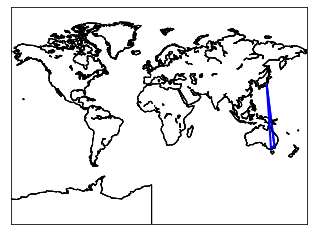

In [8]:

import city_country_csv_reader
from locations import create_example_countries_and_cities
from trip import Trip, create_example_trips
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_trip(trip: Trip, projection = 'robin', line_width=2, colour='b') -> None:
    """
    Plots a trip on a map and writes it to a file.
    Ensures a size of at least 50 degrees in each direction.
    Ensures the cities are not on the edge of the map by padding by 5 degrees.
    The name of the file is map_city1_city2_city3_..._cityX.png.
    """

    
    m = Basemap(projection=projection,lon_0=9)
    name_lst = []
    cities = trip.cities
    longs = []
    lats = []
    for city in cities:
        name_lst.append(city.name)
        xpt, ypt = m(float(city.longitude), float(city.latitude))
        longs.append(xpt)
        lats.append(ypt)
    
    m.drawcoastlines()
    name = f"{'_'.join(name_lst)}.png"
    m.plot(longs, lats, color=colour, linewidth=line_width)#, label='Flight 98')
    plt.savefig(name)
    


if __name__ == "__main__":
    city_country_csv_reader.create_cities_countries_from_CSV("worldcities_truncated.csv")

    create_example_countries_and_cities()

    trips = create_example_trips()

    for trip in trips:
        plot_trip(trip)











In [1]:
from vehicles import create_example_vehicles
import   city_country_csv_reader


city_country_csv_reader.create_cities_countries_from_CSV("worldcities_truncated.csv")

vehi_input = input("How do you want to create your cars:\nEnter")

print(vehi_input)

# vehicles =create_example_vehicles() 

# custom_vehicles =[CrappyCrepeCar(200), DiplomacyDonutDinghy(100, 500), TeleportingTarteTrolley(3, 2000)]



# trips = []

# for cities in [(canberra, melbourne, tokyo)]:
#     trip = Trip(cities[0])
#     for city in cities[1:]:
#         trip.add_next_city(city)

#         trips.append(trip)






moshood


In [2]:

"4,67,8".isdigit()



False

In [12]:

k =  [4,6,7,8,8]
k.sort()
k.index(max(k))



3

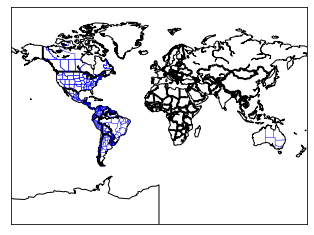

In [2]:


from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
m = Basemap(projection='mill',
            # llcrnrlat = 25,
            # llcrnrlon = -130,
            # urcrnrlat = 50,
            # urcrnrlon = -60,
            # resolution='l'
            )

m.drawcoastlines()
# m.drawcountries(linewidth=2)
# m.drawstates(color='b')

In [ ]:

city_country_csv_reader.create_cities_countries_from_CSV("worldcities_truncated.csv")                             
 #   test_example_countries_and_cities()






In [25]:

# City.cities.values() 




In [11]:

from vehicles import CrappyCrepeCar 

vehicle = CrappyCrepeCar(200) 




In [7]:

import networkx as nx

G  = nx.Graph() 


In [13]:

for i in City.cities.values():
    
    G.add_node(i)
    for j in City.cities.values():
        if j != i:
            G.add_edge(i,j,weight = vehicle.compute_travel_time(i,j) )                       




In [18]:
cities_v = list(City.cities.values()) 


G[cities_v[4]][cities_v[100]]["weight"] 



13

In [23]:

paths = nx.shortest_path(G,cities_v[6] ,cities_v[100] , weight=None, method='dijkstra')                   




['Kawasaki (JPN)', 'Cebu City (PHL)']

In [11]:
import math

if math.inf != 2 :
    print(2)
else:
    pass




2


In [ ]:
def mine(name ,*lst):
    if lst:
        print(name,lst[0])
    else:
        print(name)

mine('moshood',[2,5,5,6,3])

moshood [2, 5, 5, 6, 3]


In [ ]:
# (4)  Create the following file of products

# The fields in this example are
# product_code,product_name,price
# Write a program that accepts as input
# The product code
# The quantity purchased
# The outputs
# The product name
# The price
# The total cost for that product (price x quantity)